# Empezamos con el machine learning 

![legtsgo](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExaWVjYjRwbmh2OXkweTJnZ2U1Z3E4bHozd2duMXdxenZ0amh3NXc0ayZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/2juvZoQ3oLa4U/giphy.gif)

# Importamos todas las librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 
        
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from lazypredict.Supervised import LazyRegressor

In [3]:
df = pd.read_csv(r'C:\Users\gaelm\Desktop\vuelos_limpio.csv')
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,euros_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,66.14
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,66.14
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,66.18
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,66.17
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,66.17


### Nos quitamos estas columnas que no nos sirven para el machine learning

In [4]:
df.drop(columns=["flight"], inplace =True)

In [5]:
df.drop(columns=["price"], inplace =True)

In [6]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,euros_price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,66.14
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,66.14
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,66.18
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,66.17
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,66.17
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,769.61
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,856.72
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,878.88
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,906.50


### Separamos las categoricas y las numericas para poder hacer dummies con las categoricas

In [7]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [8]:
num

,duration,days_left,euros_price
0,2.17,1,66.14
1,2.33,1,66.14
2,2.17,1,66.18
3,2.25,1,66.17
4,2.33,1,66.17
...,...,...,...
300148,10.08,49,769.61
300149,10.42,49,856.72
300150,13.83,49,878.88
300151,10.00,49,906.50


In [9]:
cat

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


### Hacemos dummies

In [10]:
dummies = pd.get_dummies(df.select_dtypes(exclude='number'), dtype=int)

In [11]:
dummies

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
300149,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
300150,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
300151,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


### Concatenamos el df con nummies y con numericas para poder ver las correlaciones

In [12]:
encoded_df = pd.concat([dummies, num],axis=1)

In [13]:
encoded_df

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left,euros_price
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2.17,1,66.14
1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,2.33,1,66.14
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,2.17,1,66.18
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,2.25,1,66.17
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,2.33,1,66.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,10.08,49,769.61
300149,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,10.42,49,856.72
300150,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,13.83,49,878.88
300151,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,10.00,49,906.50


In [14]:
encoded_df.corr()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left,euros_price
airline_AirAsia,1.00,-0.14,-0.07,-0.10,-0.04,-0.21,0.02,-0.03,0.04,-0.01,0.01,-0.04,0.02,0.00,0.01,0.02,-0.05,0.02,-0.08,0.11,0.02,0.00,0.04,-0.05,0.19,-0.02,-0.05,0.03,-0.03,0.05,-0.03,0.01,-0.03,-0.16,0.16,-0.11,0.03,-0.18
airline_Air_India,-0.14,1.00,-0.18,-0.25,-0.11,-0.52,-0.04,-0.01,0.01,0.00,-0.00,0.04,-0.04,0.03,0.02,-0.01,-0.02,0.01,0.07,-0.00,-0.08,0.03,-0.03,-0.04,-0.06,0.07,-0.00,-0.04,0.01,-0.02,0.01,-0.01,0.04,0.12,-0.12,0.28,-0.02,0.07
airline_GO_FIRST,-0.07,-0.18,1.00,-0.12,-0.05,-0.25,0.02,-0.06,0.03,-0.02,0.00,0.03,0.04,0.03,-0.00,0.01,-0.04,-0.03,0.01,-0.04,0.02,0.02,0.09,-0.04,0.10,-0.06,-0.00,0.01,-0.06,0.03,-0.03,-0.00,0.03,-0.19,0.19,-0.14,0.03,-0.19
airline_Indigo,-0.10,-0.25,-0.12,1.00,-0.07,-0.35,-0.01,0.03,-0.01,0.01,0.02,-0.03,0.09,-0.03,-0.02,0.08,0.03,-0.07,-0.12,-0.05,0.18,0.05,0.01,0.01,0.07,-0.08,-0.01,-0.01,0.02,-0.00,0.00,0.03,-0.03,-0.28,0.28,-0.37,0.01,-0.28
airline_SpiceJet,-0.04,-0.11,-0.05,-0.07,1.00,-0.15,-0.02,0.00,0.03,-0.05,0.03,-0.00,-0.01,0.03,0.00,-0.01,-0.03,0.01,-0.05,-0.04,0.08,-0.02,0.02,-0.04,0.00,0.03,0.01,-0.02,-0.00,0.04,-0.05,0.03,-0.00,-0.12,0.12,0.01,-0.02,-0.11
airline_Vistara,-0.21,-0.52,-0.25,-0.35,-0.15,1.00,0.03,0.03,-0.05,0.03,-0.03,-0.01,-0.05,-0.04,-0.01,-0.06,0.06,0.04,0.08,0.02,-0.11,-0.07,-0.06,0.09,-0.14,0.03,0.02,0.03,0.03,-0.04,0.04,-0.03,-0.02,0.30,-0.30,0.13,-0.01,0.36
source_city_Bangalore,0.02,-0.04,0.02,-0.01,-0.02,0.03,1.00,-0.18,-0.23,-0.18,-0.20,-0.23,-0.07,0.04,0.06,0.03,-0.00,-0.05,0.01,-0.00,-0.01,0.01,0.02,0.02,0.01,-0.01,-0.03,-0.21,-0.02,0.09,0.04,0.03,0.06,0.00,-0.00,-0.01,-0.00,0.01
source_city_Chennai,-0.03,-0.01,-0.06,0.03,0.00,0.03,-0.18,1.00,-0.19,-0.15,-0.16,-0.19,-0.01,0.02,-0.07,-0.01,0.03,0.04,0.02,-0.00,-0.03,0.01,-0.02,0.02,0.01,-0.02,0.00,-0.00,-0.15,0.06,0.02,0.02,0.04,0.01,-0.01,0.03,0.00,0.02
source_city_Delhi,0.04,0.01,0.03,-0.01,0.03,-0.05,-0.23,-0.19,1.00,-0.20,-0.22,-0.26,0.03,-0.03,0.07,0.01,-0.02,-0.06,-0.07,0.01,0.07,0.01,0.08,-0.03,-0.03,0.00,-0.01,0.08,0.06,-0.25,0.01,0.04,0.07,-0.01,0.01,-0.05,-0.00,-0.04
source_city_Hyderabad,-0.01,0.00,-0.02,0.01,-0.05,0.03,-0.18,-0.15,-0.20,1.00,-0.17,-0.20,0.02,-0.01,-0.07,-0.02,0.01,0.07,0.04,-0.02,-0.03,-0.01,-0.02,-0.00,0.01,0.01,0.01,0.02,0.03,0.02,-0.16,0.03,0.05,0.00,-0.00,0.00,0.01,-0.01


In [15]:
df_corr = round(encoded_df.corr(), 2)

### Hacemos un heatmap para ver mas claras las correlaciones que hay

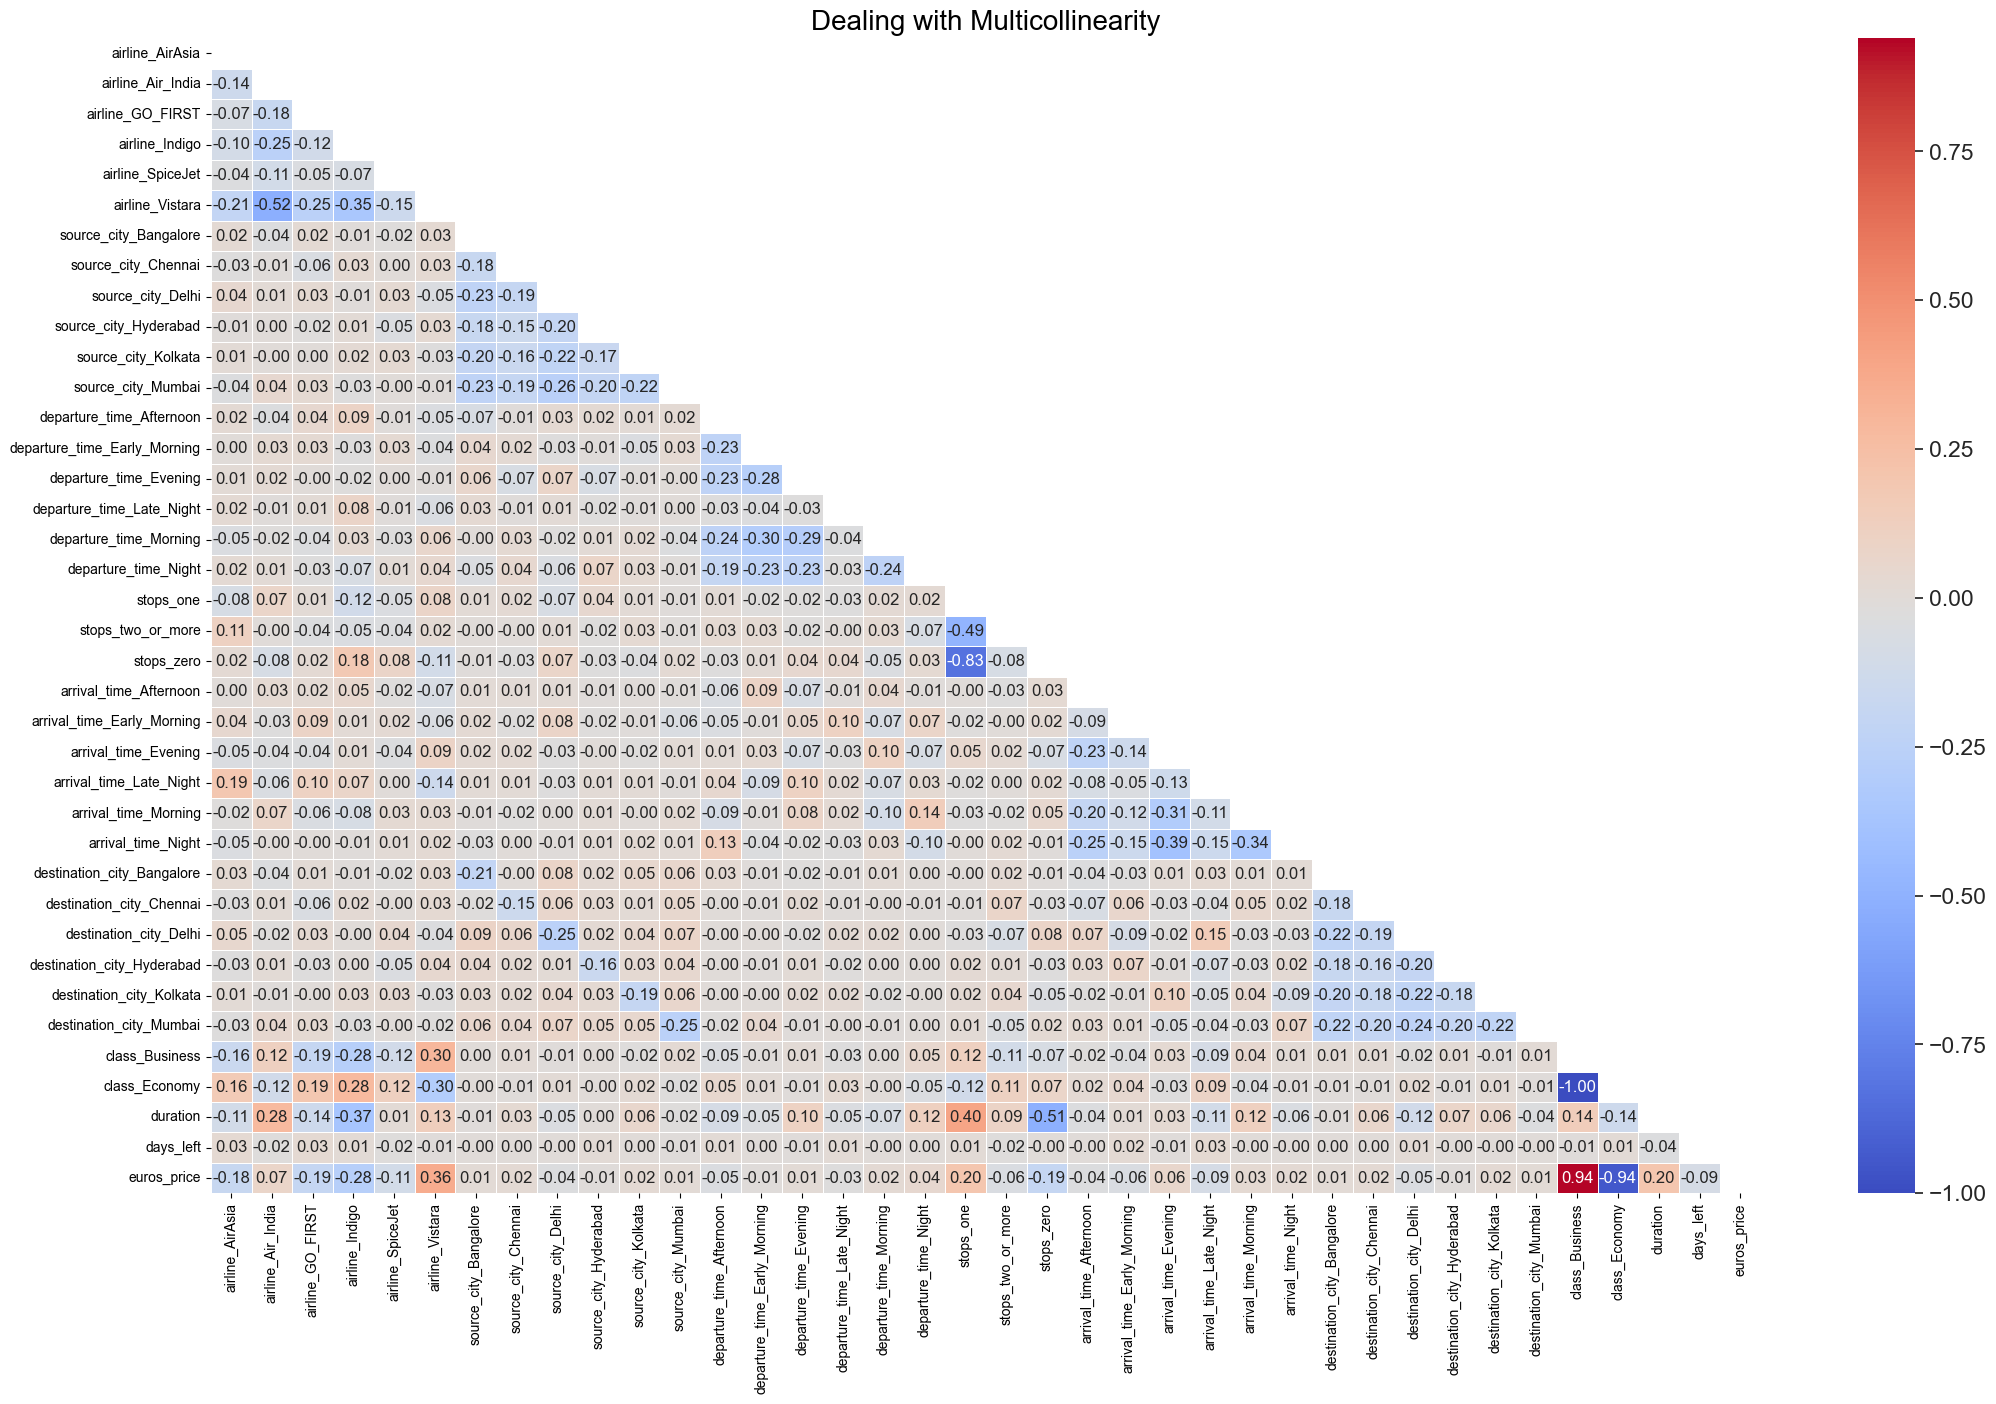

In [16]:
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(df_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Empezamos con la parte de machine learning

### Separamos la "X" y la "y" depues hacemos el X_train, X_test, y_train, y_test ...

In [17]:
X = encoded_df.drop("euros_price", axis=1)
y = df["euros_price"] 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 300153.
70% for training data: 210107.
30% for test data: 90046.


## Seleccionamos el modelo de linear regression

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
predictions = model.predict(X_test)

In [22]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 90046.


In [23]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

In [24]:
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.9115
RMSE =  74.999
The value of the metric MSE is  5624.8569
MAE =  50.618


### Hacemos un lazy regressor para ver todos los modelos que nos sirven y ver cual es el mejor

# ATENCION!!!!! SI LO CORRES SE QUEDA PARADO EN EL 62%

### El mejor modelo que nos da hasta el 62% es el de ExtraTreeRegressor

In [ ]:
regressor = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

# Mostrar los resultados ordenados por R²
print(models.head(10))

  2%|▏         | 1/42 [00:08<06:02,  8.83s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9332471809356433, 'Adjusted R-Squared': 0.9332197405491734, 'RMSE': 65.12612631972523, 'Time taken': 8.83271861076355}


  5%|▍         | 2/42 [00:17<05:52,  8.82s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9836648953347336, 'Adjusted R-Squared': 0.9836581803885887, 'RMSE': 32.21672591707907, 'Time taken': 8.819104194641113}


  7%|▋         | 3/42 [00:18<03:19,  5.12s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.9114751118499338, 'Adjusted R-Squared': 0.9114387215195014, 'RMSE': 74.9985962831079, 'Time taken': 0.7038447856903076}


 10%|▉         | 4/42 [00:19<02:21,  3.72s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9757268345605146, 'Adjusted R-Squared': 0.9757168564794411, 'RMSE': 39.27205701317301, 'Time taken': 1.5842442512512207}


 12%|█▏        | 5/42 [00:20<01:31,  2.48s/it]

{'Model': 'DummyRegressor', 'R-Squared': -8.544331626669788e-07, 'Adjusted R-Squared': -0.00041192935554756893, 'RMSE': 252.0696899215205, 'Time taken': 0.2808949947357178}


 14%|█▍        | 6/42 [00:20<01:03,  1.77s/it]

{'Model': 'ElasticNet', 'R-Squared': 0.874359267774899, 'Adjusted R-Squared': 0.8743076200647807, 'RMSE': 89.34817188031231, 'Time taken': 0.38746166229248047}


 17%|█▋        | 7/42 [00:23<01:10,  2.02s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9004064582063809, 'Adjusted R-Squared': 0.9003655178338988, 'RMSE': 79.54923915760625, 'Time taken': 2.5378799438476562}


 19%|█▉        | 8/42 [00:24<01:00,  1.78s/it]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9741820771895476, 'Adjusted R-Squared': 0.9741714640980004, 'RMSE': 40.50243098130703, 'Time taken': 1.2696471214294434}


 21%|██▏       | 9/42 [02:01<17:25, 31.69s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9824857380296602, 'Adjusted R-Squared': 0.9824785383619318, 'RMSE': 33.35925647282313, 'Time taken': 97.46644878387451}


 24%|██▍       | 10/42 [02:02<11:45, 22.04s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.752489100242197, 'Adjusted R-Squared': 0.7523873548052242, 'RMSE': 125.405795107772, 'Time taken': 0.438645601272583}


 29%|██▊       | 12/42 [02:24<08:42, 17.40s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9520907610132137, 'Adjusted R-Squared': 0.9520710667433431, 'RMSE': 55.173441935649805, 'Time taken': 22.041208505630493}


 31%|███       | 13/42 [02:27<06:13, 12.87s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9703704583254218, 'Adjusted R-Squared': 0.9703582783742846, 'RMSE': 43.38932644738653, 'Time taken': 2.4530978202819824}


 33%|███▎      | 14/42 [02:28<04:27,  9.55s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9040286315258257, 'Adjusted R-Squared': 0.9039891801366876, 'RMSE': 78.08925605311254, 'Time taken': 1.886915683746338}


 36%|███▌      | 15/42 [02:54<06:31, 14.51s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9701146982806741, 'Adjusted R-Squared': 0.9701024131930862, 'RMSE': 43.57619081609599, 'Time taken': 25.989760398864746}


 40%|████      | 17/42 [02:55<03:01,  7.26s/it]

{'Model': 'Lars', 'R-Squared': -0.17781748408872766, 'Adjusted R-Squared': -0.17830165490589156, 'RMSE': 273.5643116678836, 'Time taken': 0.3679625988006592}


 43%|████▎     | 18/42 [02:57<02:13,  5.58s/it]

{'Model': 'LarsCV', 'R-Squared': 0.14150915220553606, 'Adjusted R-Squared': 0.14115624844844343, 'RMSE': 233.5545198726145, 'Time taken': 1.6622991561889648}


 45%|████▌     | 19/42 [03:00<01:50,  4.81s/it]

{'Model': 'Lasso', 'R-Squared': 0.9111730895958396, 'Adjusted R-Squared': 0.9111365751117387, 'RMSE': 75.12642450480321, 'Time taken': 3.0310990810394287}


 48%|████▊     | 20/42 [03:03<01:33,  4.23s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9114598843677675, 'Adjusted R-Squared': 0.9114234877777044, 'RMSE': 75.00504639394056, 'Time taken': 2.8727991580963135}


 50%|█████     | 21/42 [03:03<01:04,  3.07s/it]

{'Model': 'LassoLars', 'R-Squared': 0.9064867122138526, 'Adjusted R-Squared': 0.9064482712791792, 'RMSE': 77.08273308263018, 'Time taken': 0.36498284339904785}


 52%|█████▏    | 22/42 [03:04<00:51,  2.57s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9064867122138526, 'Adjusted R-Squared': 0.9064482712791792, 'RMSE': 77.08273308263018, 'Time taken': 1.392488718032837}


 55%|█████▍    | 23/42 [03:05<00:37,  1.99s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9064867122138526, 'Adjusted R-Squared': 0.9064482712791792, 'RMSE': 77.08273308263018, 'Time taken': 0.6380336284637451}


 57%|█████▋    | 24/42 [03:06<00:27,  1.53s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.9114744181399952, 'Adjusted R-Squared': 0.9114380275243964, 'RMSE': 74.99889013928092, 'Time taken': 0.46520376205444336}


 60%|█████▉    | 25/42 [03:08<00:32,  1.90s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.902019442293996, 'Adjusted R-Squared': 0.901979164978256, 'RMSE': 78.90243300929907, 'Time taken': 2.766040325164795}


 62%|██████▏   | 26/42 [05:19<10:47, 40.48s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9667891252614677, 'Adjusted R-Squared': 0.966775473115377, 'RMSE': 45.93678522878812, 'Time taken': 130.4769904613495}
